# Applying the Data Analysis Method to a Research Problem

# 1. Determine Research Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>


## 1.1. Title <a class="anchor" id="Title"></a>
### Movie Recommender Systems

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## 1.2. Introduction <a class="anchor" id="Introduction"></a> 
We are all forced to make choices every day. With people living busy lives, there is an appreciation of alleviating the burden of having to make decisions. On the Internet, there is an enormous supply of tv shows and films to watch, and people lack the time or motivation to choose. The need for filtering the catalogue of content available to users is essential, to lessen the excessive amount of information provided. Recommender Systems tackle the paradox of too much choice and too little time. <br><br>
A recommender system is a data filtering system that aims to reduce this problem of excessive information by suggesting an item to a user, based on their preference of another. (Rocca, 2019)  <br>
Netflix will suggest other movies or tv shows you may want to watch, based on what you watched previously. LinkedIn refers to other people you may want to connect to, based on your previous connections. Amazon will suggest products based on past purchases, whether it be similar products or products that you can pair with the item.

### The Movies Dataset
For this analysis, we will be using the Movies Dataset dataset, a large dataset from Kaggle. The movies file is a large file containing information about 45000 movies. This dataset also has a ratings file from 270,000 users for all movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website. For this analysis, we will be removing any information that  is unnecessary for the recommender systems. <br> 
The data includes information about each film, ranging from the title, the genre, the budget, to the overview, the production country, and imdb rating from the IMDB website. <br>
This analysis aims to build a recommender system for the chosen dataset. To begin, we will start by describing the data. It will highlight the quality of the data and see if it matches the requirements for the analysis. We will then explore the data and address data mining questions using querying, data visualization and reporting techniques. Finally we will attempt to create two simple recommender systems.

### Recommender Systems
There are different approaches to recommender systems. The recommender should recommend films based on users interests. There are different methods for recommender systems. The two most popular approaches are: <br>Content-based: Recommendations are determined based on items similar to what the user likes, concerning their content.

Collaborative filtering: Recommendations are determined based on user feedback provided with similar interests. Amazon uses an item to item collaborative filtering method( users who buy a phone also will buy a phone case). <br>

For the content-based filtering recommender system we will only recommend movies based on the overview of each movie.<br>
For the collaborative-filtering recommender system we will recommend movies based on a users ratings of other movies.
 

## 1.3. Background <a class="anchor" id="Background"></a>

###Amazon
Amazon, the world’s largest retailer, has been using its own recommender system for over two decades. (Linden, et al., 1998)
Its recommender algorithm uses item-based collaborative filtering based on users past behaviour. It allows them to discover items which they may never have found on their own. (Smith & Linden, 2017)
The algorithm was so successful that it is now used by many other large companies such as Youtube and Netflix. <br>

###Netflix
The Netflix Prize was a competition held in 2006. (Striphas & Hallinan, 2014) It was open to anyone that could build a recommender system, better than Netflix's own. The system should produce recommendations for users based on previous ratings, without any other information about the users or films. On September 21, BellKor won the competition by creating an algorithm better than Netflix's own algorithm for predicting ratings by 10.06%. They were awarded a prize of $1,000,000. (Striphas & Hallinan, 2014)

 ## 1.4 Research Question <a class="anchor" id="Research Question"></a>

For this project I will be answering the following questions:


*   Is it possible to generate recommendations without user input, based solely on content for the Movies Dataset?
*   Are collaborative-filtering recommender systems an effective method of generating recommendations for users?



# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Load Data <a class="anchor" id="Datareport"></a>


In [2]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline
import missingno as msno
import numpy as np
from ast import literal_eval
import seaborn as sns

In [3]:
#Data source: 
#Source Query location: 
movies=pd.read_csv('/content/drive/My Drive/Colab Notebooks/working_folder/movies_metadata.csv')
ratings=pd.read_csv('/content/drive/My Drive/Colab Notebooks/working_folder/ratings_small.csv')
keywords = pd.read_csv('/content/drive/My Drive/Colab Notebooks/working_folder/keywords.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
For this analysis I will be using three files from The Movies Dataset. The files are in CSV(Comma separated values) text file format.

In [4]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
keywords.columns

Index(['id', 'keywords'], dtype='object')

You can see from the output that the "ratings.csv" file contains the userId, movieId, ratings, and timestamp attributes. Each row in the dataset corresponds to one rating. The userId column contains the ID of the user who left the rating. The movieId column contains the Id of the movie, the rating column contains the rating left by the user. Ratings can have values between 1 and 5. And finally, the timestamp refers to the time at which the user left the rating. <br>
As you can see, this movies file contains a lot of information including movieId, the title of the movie, and its genre. We need a dataset that contains the userId, movie title, and its ratings. We have this information in two different dataframe objects: "ratings" and "movies". To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.

In [7]:
# Shapes of dataframes
print("Movies:", movies.shape)
print("Ratings:", ratings.shape)
print("Keywords:", keywords.shape)

Movies: (45466, 24)
Ratings: (100004, 4)
Keywords: (46419, 2)


In [8]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [9]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [10]:
keywords.dtypes

id           int64
keywords    object
dtype: object

All datasets has a similar column 'id' relating to each movies IMDB id. However in the Movies dataframe, the id datatype is object while in the ratings and keywords dataframes, ids' datatype is int64. We can change this later.

In [11]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [12]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [15]:
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [16]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>



### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The movie dataset consists in 45466 films which are described by 24 variables. As in every analysis, at some point, we will have to deal with the missing values and as a first step, I determine the amount of data which is missing in every variable.

In [17]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

From the data we can see there is data missing:

40872 entries missing from the belongs_to_collection column

37684 entries from the homepage column

17 entries from the imbd_id column

11 entries from the original_language column

954 entries from the overview column

5 entries from the popularity column

386 entries from the poster_path column

3 entries from the production_companies column

3 entries from the production_countries column

87 entries from the release_date column

6 entries from the revenue column

263 entries from the runtime column

6 entries from the spoken_languages column

87 entries from the status column

25054 entries from the tagline column

6 entries from the title column

6 entries from the video column

6 entries from the vote_average column

6 entries from the vote_count column

For my analysis I can exlude the homepage and tagline columns as there is too much data missing from these columns and I do not require them.

In [18]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [19]:
missing_values_table(movies)

Your selected dataframe has 24 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
belongs_to_collection,40972,90.1
homepage,37684,82.9
tagline,25054,55.1
overview,954,2.1
poster_path,386,0.8
runtime,263,0.6
status,87,0.2
release_date,87,0.2
imdb_id,17,0.0
original_language,11,0.0


To get a better understanding of how much data is missing, I will be using the Missingno library which offers a nice way to visualize the distribution of NaN values. 

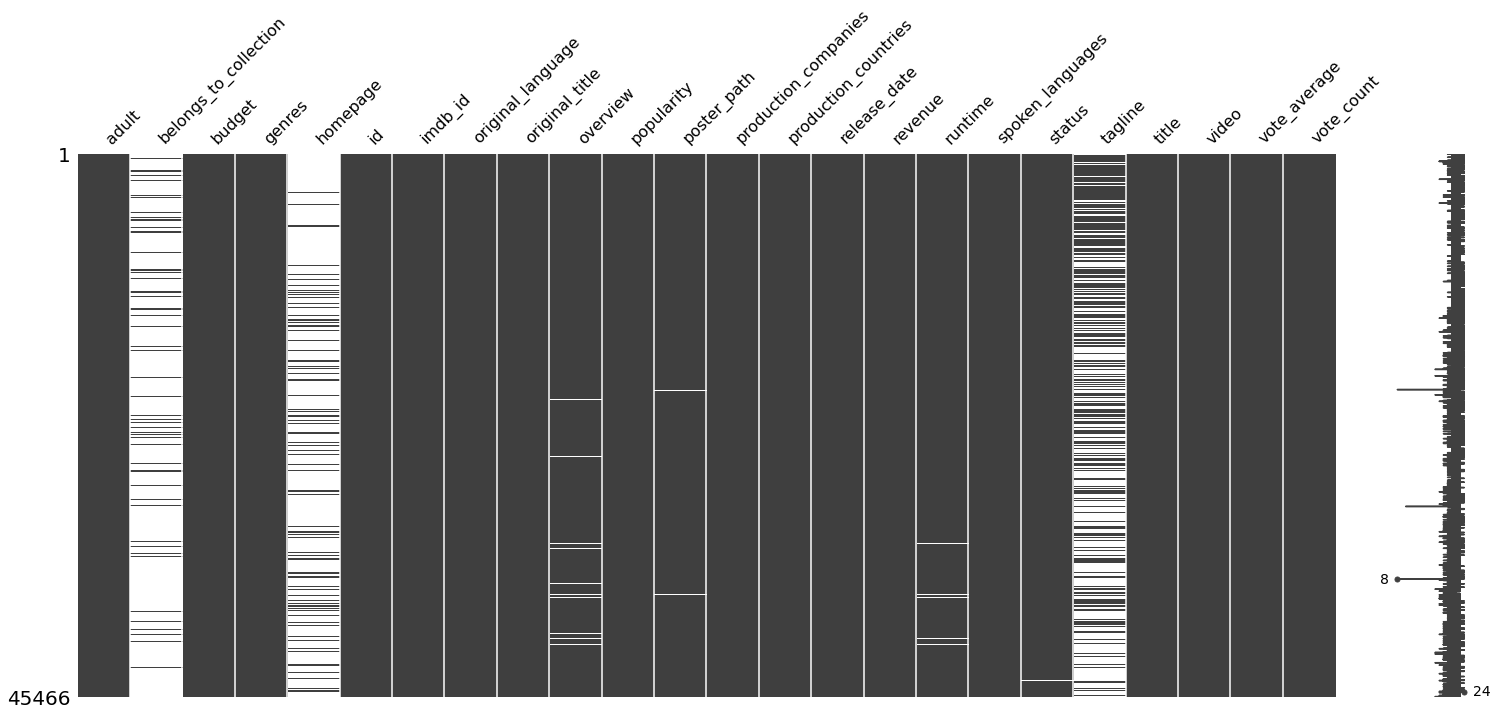

In [20]:
msno.matrix(movies)

We can make a copy of the dataset: one for Content-Based Filtering and the other for Collaborative Filtering. 

In [21]:
cbMovies = movies.copy()

In [22]:
to_drop = ['belongs_to_collection','homepage','tagline']
movies.drop(columns=to_drop, inplace=True)

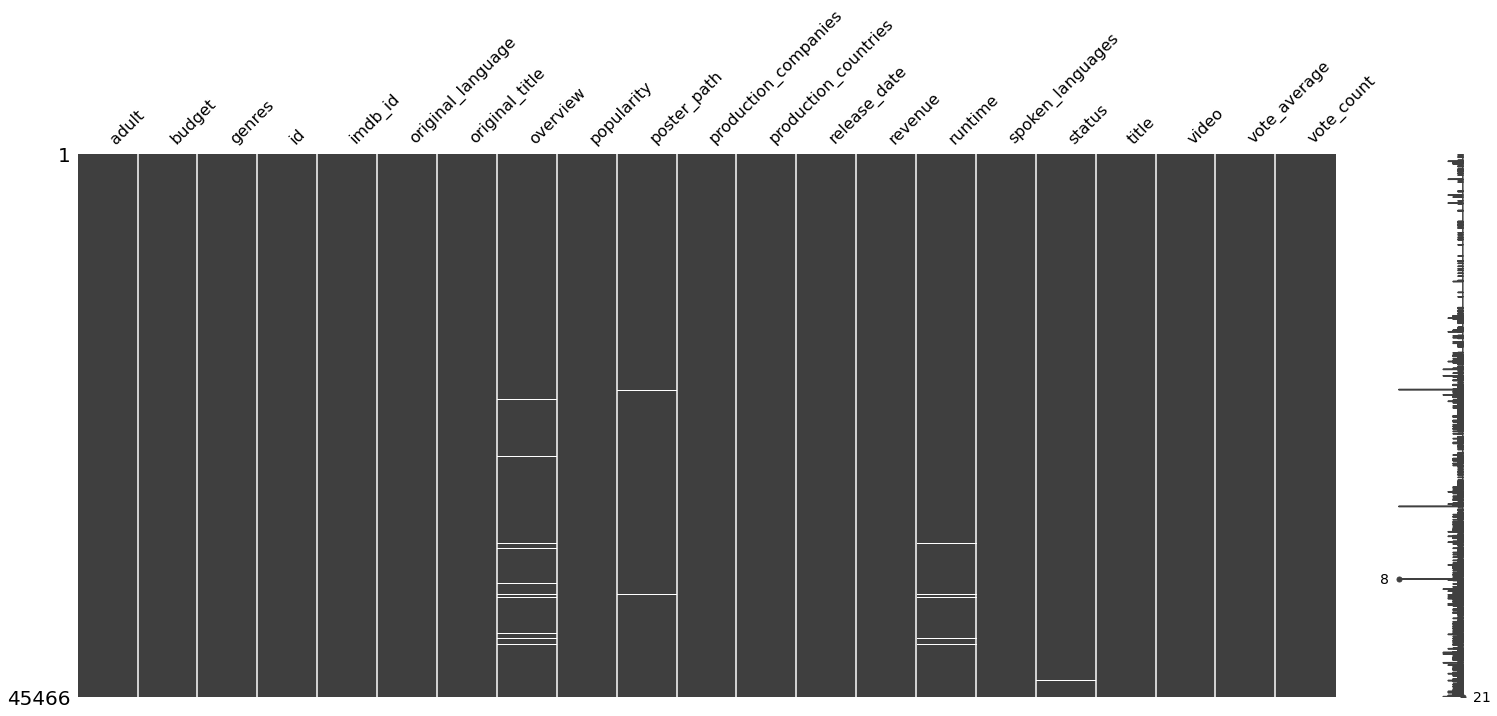

In [23]:
msno.matrix(movies)

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>


### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

To begin exploring the data, we will plot the distribution of ratings in the dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


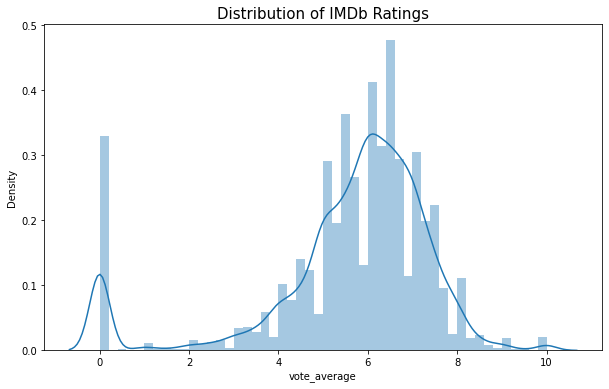

In [24]:
plt.figure(figsize=(10,6))
plt.title("Distribution of IMDb Ratings", fontsize=15)
sns.distplot(movies['vote_average'])

In [25]:
movies['vote_average'].mean()

5.618207215133889

Most of the ratings fall between 5 and 8 around the mean rating of 5.62. We can see a smaller number of extreme values on both high and low sides. There is also a large number of 0 ratings. We can filter out any extreme values at a later stage.<br> <br>


### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
###Genre Correlations<br>
Let's start by taking a subset of users, and dividing them into clusters: users who like action movies and users who like comedy movies.

In [26]:
new_ratings = ratings.groupby(['userId', 'movieId'], as_index=False)['rating'].aggregate(np.mean)


In [27]:
new_ratings

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [28]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['id'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

In [29]:
# Calculate the average rating of action and drama movies

genre_ratings = get_genre_ratings(new_ratings, movies, ['Action', 'Comedy'], ['avg_action_rating', 'avg_comedy_rating'])
print( "Number of records: ", len(genre_ratings))
genre_ratings.head()

Number of records:  671


,avg_action_rating,avg_comedy_rating
1,NaN,2.62
2,3.56,3.56
3,3.88,4.17
4,4.48,4.19
5,3.94,3.78


In [30]:
genre_ratings.dropna(inplace=True)

In [31]:
genre_ratings.head()

,avg_action_rating,avg_comedy_rating
2,3.56,3.56
3,3.88,4.17
4,4.48,4.19
5,3.94,3.78
6,3.43,2.64


In [32]:
print('dataset dimensions: ', genre_ratings.shape)

dataset dimensions:  (658, 2)


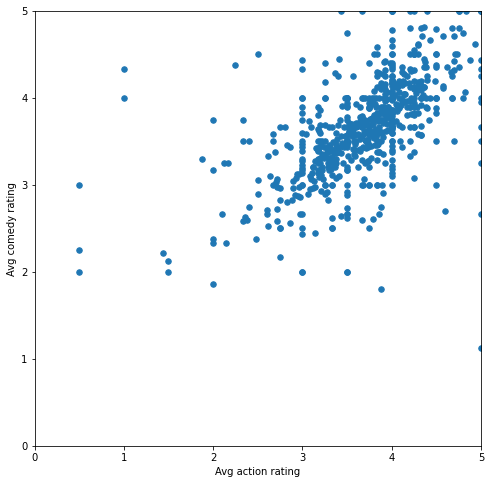

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Avg action rating')
ax.set_ylabel('Avg comedy rating')
ax.scatter(genre_ratings['avg_action_rating'], genre_ratings['avg_comedy_rating'], s=30)

The function get_genre_ratings calculated each user's average rating of all action movies and all comedy movies. 

So we can see we have 658 users, and for each user we have their average rating of the action and comedy movies they've watched.

There is not a clear spherical cluster. We need to bias the data.

In [34]:
#This method removes people who like both genres, just so that our clusters are clear
#https://github.com/digantamisra98/KMeans-Movie-Ratings/blob/master/k-means%20Clustering%20of%20Movie%20Ratings.ipynb
def biasedDataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['avg_action_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_comedy_rating'] > score_limit_2)) | ((genre_ratings['avg_comedy_rating'] < score_limit_1) & (genre_ratings['avg_action_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [35]:
newGenreRatings = biasedDataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(newGenreRatings))
newGenreRatings.head()

Number of records:  136


,index,avg_action_rating,avg_comedy_rating
0,6,3.43,2.64
1,7,3.30,3.17
2,12,2.40,2.75
3,14,3.00,2.00
4,15,2.83,2.80


We now have 136 users, and for each user we have their average rating of the action and comedy movies they've rated.

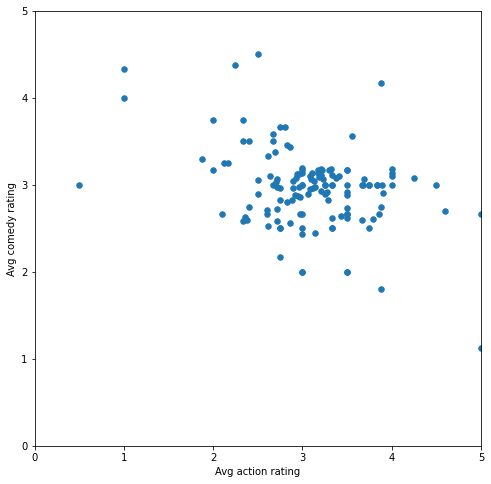

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Avg action rating')
ax.set_ylabel('Avg comedy rating')
ax.scatter(newGenreRatings['avg_action_rating'], newGenreRatings['avg_comedy_rating'], s=30)

From here we can partition our users into clusters using K-Means.

# 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>


## 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>

###**Content-based Filtering**

For the content-based recommender we will be using the movies dataset. 

In [37]:
print(cbMovies.shape)
cbMovies.head(3)

(45466, 24)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


###**Collaborative-Filtering**

For the collaborative-filtering recommender we will be using the ratings & movies dataset.

In [38]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>


### 3.2.1 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>


In [39]:
moviedata = cbMovies.drop(['budget', 'imdb_id','revenue','original_title',], axis = 1)

In [40]:
contentCB = cbMovies.drop(['video','status','runtime','adult','poster_path','production_countries','release_date','spoken_languages','original_language','budget','imdb_id','revenue','original_title','popularity','revenue','vote_average','vote_count'], axis = 1)

### 3.2.2 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>

In [41]:
# Remove rows with bad IDs.
moviedata = moviedata.drop([19730 , 29503, 35587])

In [42]:
# Remove rows with bad IDs.
contentCB = contentCB.drop([19730 , 29503, 35587])

In [43]:
moviedata['id'] = moviedata['id'].astype('int')
contentCB['id'] = contentCB['id'].astype('int')
keywords['id'] = keywords['id'].astype('int')

### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>


In [44]:
collabRatings = ratings.rename(columns={"movieId": "id"})

In [45]:
collabRatings.drop_duplicates(['id'])

,userId,id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99131,664,64997,2.5,1343761859
99159,664,72380,3.5,1344435977
99274,665,129,3.0,995232528
99678,665,4736,1.0,1010197684


## 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>



###Collaborative-Filtering

In [46]:
# Merge the ratings and movies and then pivot 
ratings_title = pd.merge(collabRatings, contentCB[['id', 'title']], on='id' )
userMovies = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', userMovies.shape)
userMovies.head(5)

dataset dimensions:  (671, 2794)


title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,1900,1942: A Love Story,1984,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,2061 - Un anno eccezionale,21 Grams,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,29th Street,2:37,3 Ninjas: High Noon at Mega Mountain,3-Iron,300,33 Scenes from Life,"4 Months, 3 Weeks and 2 Days",40 Days and 40 Nights,42nd Street,48 Hrs.,5 Card Stud,5 Days of War,...,World Trade Center,Wuthering Heights,X-Men Origins: Wolverine,X: The Unknown,Xuxa in Crystal Moon,Y Tu Mamá También,Yaji and Kita: The Midnight Pilgrims,Yamakasi,Yankee Doodle Dandy,Yella,Yesterday,You Are Not I,You Instead,You Only Live Twice,You're a Big Boy Now,"You, Me and Dupree",Young Adam,Young Black Stallion,Young Frankenstein,Young Mr. Lincoln,Young and Innocent,"Young, Violent, Dangerous",Z,Zaat,Zabriskie Point,Zapped Again!,Zardoz,Zatoichi,Zatôichi's Pilgrimage,Zazie dans le métro,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe is overun by NaN values. Most users have not rated and watched most movies. Only a small number of cells have values.

To get around this, we will get the most rated movies.

In [47]:
#this method gets the top rated number of movies in a dataset based on the users input for number of movies
#https://github.com/digantamisra98/KMeans-Movie-Ratings/blob/master/k-means%20Clustering%20of%20Movie%20Ratings.ipynb
def getMaxRatedMovies(df, max_number_of_movies):
    df = df.append(df.count(), ignore_index=True)
    df_sorted = df.sort_values(len(df)-1, axis=1, ascending=False)
    df_sorted = df_sorted.drop(df_sorted.tail(1).index)
    most_rated_movies = df_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

###CONTENT FILTERING

In [48]:
contentCB

,belongs_to_collection,genres,homepage,id,overview,production_companies,tagline,title
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",NaN,Toy Story
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Roll the dice and unleash the excitement!,Jumanji
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,Friends are the people who let you be yourself...,Waiting to Exhale
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",NaN,11862,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II
...,...,...,...,...,...,...,...,...
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,Rising and falling between a man and woman.,[],Rising and falling between a man and woman,Subdue
45462,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,An artist struggles to finish his work while a...,"[{'name': 'Sine Olivia', 'id': 19653}]",NaN,Century of Birthing
45463,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,"When one of her hits goes wrong, a professiona...","[{'name': 'American World Pictures', 'id': 6165}]",A deadly game of wits.,Betrayal
45464,NaN,[],NaN,227506,"In a small town live two brothers, one a minis...","[{'name': 'Yermoliev', 'id': 88753}]",NaN,Satan Triumphant


In order to use the data from the columns, we need to convert the data from json to String.

In [49]:
# changing the genres column from json to string
contentCB['genres'] = contentCB['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [50]:
# changing the production column from json to string
contentCB['production_companies'] = contentCB['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

We can also drop all the missing rows from overviews.

In [51]:
contentCB.dropna(inplace=True)

## 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>



## **COLLABORATIVE FILTERING**

First we're going to only include the top 1000 rated movies for our collaborative-filtering recommender. This should reduce the number of NaN values. This should also help with performance as the dataset is so large.

In [52]:
noMovies = 1000
mostMoviesRatings = getMaxRatedMovies(userMovies,noMovies)

print('dataset dimensions: ', mostMoviesRatings.shape)
mostMoviesRatings.fillna(' ').head()


dataset dimensions:  (671, 1000)


title,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Solaris,The 39 Steps,Monsoon Wedding,Once Were Warriors,Three Colors: Red,Men in Black II,The Passion of Joan of Arc,Silent Hill,Sissi,The Hours,License to Wed,48 Hrs.,5 Card Stud,Batman Returns,Sleepless in Seattle,Rain Man,The Conversation,Young and Innocent,Say Anything...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,"Bang, Boom, Bang",Beauty and the Beast,Bridge to Terabithia,All the Way Boys,The Tunnel,Dawn of the Dead,Syriana,Reservoir Dogs,Arlington Road,The Man with the Golden Arm,Grill Point,Back to the Future Part II,The Thomas Crown Affair,Mothra vs. Godzilla,A River Runs Through It,...,Marnie,Curtains,The Omen,S21: The Khmer Rouge Death Machine,Chill Factor,The Domino Principle,Shower,In My Skin,All the President's Men,Bill & Ted's Excellent Adventure,The Dress,A Star Is Born,Rashomon,Kikujiro,Begotten,Spider-Man 2,Training Day,Breakdown,Finding Forrester,The Whole Nine Yards,They Live,The Dark Knight,There's Something About Mary,Keeping the Faith,Trainspotting,Monsieur Batignole,Ed Wood,The Thin Man,"The Good, the Bad and the Ugly",8½,March of the Penguins,Birthday Girl,Brief Encounter,The Revengers' Comedies,The Anniversary,Flash Gordon,Anyone Can Play,Stitches,Forrest Gump,Tron
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,,3,,4,4,4,,,3,3,5,,5,,3,,,5,,,,,3,,,,,,,,,4,,,,3,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,4.5,5,3,,,3,4,,,3,,,5,,,,,,3,3.5,4,3.5,,2.5,2,,,,4.5,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,5,,,5,5,,,,,5,,3,,,,5,5,3,,,,5,4,,,,,5,,,,,,5,5,,,5,,,...,,,,,,,,,,,,,,,,,4,,,,,,,,,,,,,,,,,,,,,,,
4,,,,,,,,,,3.5,,,,4,,4,2.5,,,3.5,,,5,4,4,3.5,,,4,,,3.5,4.5,,,,,,4,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Now that we have a dataset with 1000 movies with the headings we need, we can go onto modelling the collaborative-filtering recommender.

## **CONTENT-BASED FILTERING**

In [53]:
moviedata = contentCB.merge(keywords, on='id')

In [54]:
moviedata

,belongs_to_collection,genres,homepage,id,overview,production_companies,tagline,title,keywords
0,"{'id': 645, 'name': 'James Bond Collection', '...","[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,James Bond must unmask the mysterious head of ...,"[United Artists, Eon Productions]",No limits. No fears. No substitutes.,GoldenEye,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam..."
1,"{'id': 43563, 'name': 'Friday Collection', 'po...",[Comedy],http://www.newline.com/properties/friday.html,10634,Craig and Smokey are two guys in Los Angeles h...,[New Line Cinema],A lot can go down between thursday and saturda...,Friday,"[{'id': 897, 'name': 'rap music'}, {'id': 970,..."
2,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...","[Horror, Action, Thriller, Crime]",http://www.miramax.com/movie/from-dusk-till-dawn/,755,Seth Gecko and his younger brother Richard are...,"[A Band Apart, Dimension Films, Los Hooligans ...",One night is all that stands between them and ...,From Dusk Till Dawn,"[{'id': 246, 'name': 'dancing'}, {'id': 380, '..."
3,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",[Comedy],http://miramax.com/movie/blue-in-the-face/,5894,"Auggie runs a small tobacco shop in Brooklyn, ...","[Miramax Films, InterAL]",Welcome to the planet Brooklyn.,Blue in the Face,"[{'id': 919, 'name': 'smoking'}, {'id': 1901, ..."
4,"{'id': 286162, 'name': 'Power Rangers Collecti...","[Action, Adventure, Science Fiction, Family, F...",http://www.powerrangers.com/,9070,Power up with six incredible teens who out-man...,"[Twentieth Century Fox Film Corporation, Saban...",The Power Is On!,Mighty Morphin Power Rangers: The Movie,"[{'id': 10988, 'name': 'based on tv series'}, ..."
...,...,...,...,...,...,...,...,...,...
695,"{'id': 473840, 'name': 'Little Forest Collecti...",[Drama],https://web.archive.org/web/20160111092554/htt...,294682,"Abandoned by her mother, young Ichiko leaves h...",[Shochiku],Back to nature.,Little Forest: Summer/Autumn,"[{'id': 5888, 'name': 'agriculture'}, {'id': 1..."
696,"{'id': 173710, 'name': 'Planet of the Apes (Re...","[Drama, Science Fiction, War]",http://www.foxmovies.com/movies/war-for-the-pl...,281338,Caesar and his apes are forced into a deadly c...,[Chernin Entertainment],For freedom. For family. For the planet.,War for the Planet of the Apes,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
697,"{'id': 476961, 'name': 'Goon Collection', 'pos...",[Comedy],https://www.facebook.com/GoonFilm/?fref=ts,336890,"During a pro lockout, Doug ""The Thug"" Glatt is...",[Caramel Film],Glatt's Back!,Goon: Last of the Enforcers,"[{'id': 6483, 'name': 'ice hockey'}]"
698,"{'id': 8650, 'name': 'Transformers Collection'...","[Action, Science Fiction, Thriller, Adventure]",http://www.transformersmovie.com/,335988,"Autobots and Decepticons are at war, with huma...","[Paramount Pictures, Di Bonaventura Pictures, ...","For one world to live, the other must die.",Transformers: The Last Knight,"[{'id': 10466, 'name': 'knight'}, {'id': 10607..."


In [55]:
# changing the keywords column from json to string
moviedata['keywords'] = moviedata['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [56]:
moviedata.head(5)

,belongs_to_collection,genres,homepage,id,overview,production_companies,tagline,title,keywords
0,"{'id': 645, 'name': 'James Bond Collection', '...","[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,James Bond must unmask the mysterious head of ...,"[United Artists, Eon Productions]",No limits. No fears. No substitutes.,GoldenEye,"[cuba, falsely accused, secret identity, compu..."
1,"{'id': 43563, 'name': 'Friday Collection', 'po...",[Comedy],http://www.newline.com/properties/friday.html,10634,Craig and Smokey are two guys in Los Angeles h...,[New Line Cinema],A lot can go down between thursday and saturda...,Friday,"[rap music, parent child relationship, rapper,..."
2,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...","[Horror, Action, Thriller, Crime]",http://www.miramax.com/movie/from-dusk-till-dawn/,755,Seth Gecko and his younger brother Richard are...,"[A Band Apart, Dimension Films, Los Hooligans ...",One night is all that stands between them and ...,From Dusk Till Dawn,"[dancing, brother brother relationship, sexual..."
3,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",[Comedy],http://miramax.com/movie/blue-in-the-face/,5894,"Auggie runs a small tobacco shop in Brooklyn, ...","[Miramax Films, InterAL]",Welcome to the planet Brooklyn.,Blue in the Face,"[smoking, corner shop, cigarette, tobacco, cig..."
4,"{'id': 286162, 'name': 'Power Rangers Collecti...","[Action, Adventure, Science Fiction, Family, F...",http://www.powerrangers.com/,9070,Power up with six incredible teens who out-man...,"[Twentieth Century Fox Film Corporation, Saban...",The Power Is On!,Mighty Morphin Power Rangers: The Movie,"[based on tv series, tokusatsu, superhero team..."


In [57]:
moviedata.dropna(inplace=True)

We can drop the columns that we do not need.

In [58]:
cb_Moviedata = moviedata.drop(['belongs_to_collection', 'homepage','tagline',], axis = 1)
print("Dimensions",cb_Moviedata.shape)

Dimensions (700, 6)


Now that we have a dataset with 700 movies with the headings we need, we can go onto modelling the content-based recommender.

# 4. Modelling <a class="anchor" id="Modelling"></a>



## 4.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>


## **COLLABORATIVE FILTERING RECOMMENDER**

For the collaborative-filtering recommender system, we will be recommending movies to users based on their ratings of other movies. We will need to group users who have rated movies similarily. For this, we will use K-Means Clustering which is a technique used for data cluster analysis. (Garbade, 2018)

**K-Means Clustering** is an algorithm of vector quantization that tries to group observations into clusters, where each data point belongs to only one group. (Dabbura, 2018)

In [59]:
#Import KMeans
from sklearn.cluster import KMeans 
from scipy.sparse import csr_matrix

## **CONTENT-BASED RECOMMENDER**

For the content-based recommender system, we will be comparing the overviews of each movie. We will need to calculate the similarity between two texts being the overviews. For this, we will use TF-IDF and Cosine Similarity. <br>
Text similarity aims to establish how ‘close’ two pieces of text are both in surface closeness and meaning. (Sieg, 2018) 
The idea is to represent the overviews of movies as vectors, and calculate the similarity of each movie overview by measuring the distance between these vectors. 

**Term Frequency-Inverse Document Frequency (TF-IDF)** is a technique used to convert text into vectors. (Jayaswal, 2020) It evaluates the relevancy of words in a document by multiplying two metrics: the number of times a word appears in a document, and the rarity of it across a set of documents. (Stecanella, 2019)

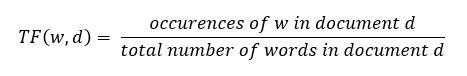

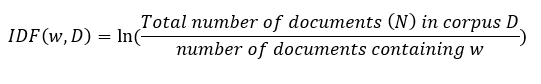


**Cosine similarity** calculates the similarity of vectors by measuring the angle between these two vectors. (Sieg, 2018) The smaller the angle, the higher the similarity between the two texts.

Mathematically, it measures the similarity between two non-zero vectors of an inner product space. The cosine of 0° is 1, and it is less than 1 for any angle in the interval (0, π] radians. (Alake, 2020) Matching vectors will have a cosine similarity of 1, two vectors relative to each other have a similarity of 0, and two vectors diametrically opposed have a similarity of -1.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf = TfidfVectorizer(stop_words='english')


## 5.3. Build Model <a class="anchor" id="BuildModel"></a>


## **COLLABORATIVE FILTERING RECOMMENDER**

In [61]:
# Let's turn our dataset into a list
X = newGenreRatings[['avg_action_rating','avg_comedy_rating']].values

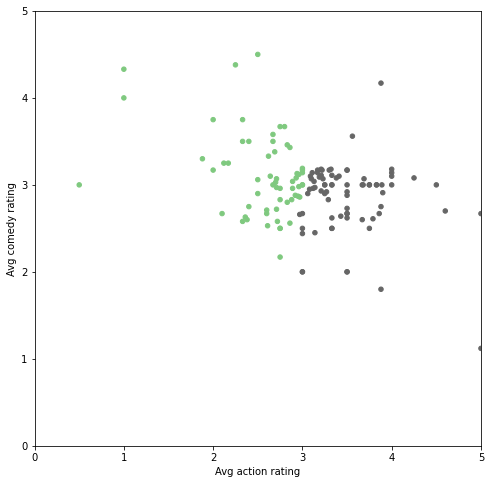

In [62]:
# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

#use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Avg action rating')
ax.set_ylabel('Avg comedy rating')

clustered = pd.concat([newGenreRatings.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['avg_action_rating'], clustered['avg_comedy_rating'], c=clustered['group'], s=20, cmap="Accent")

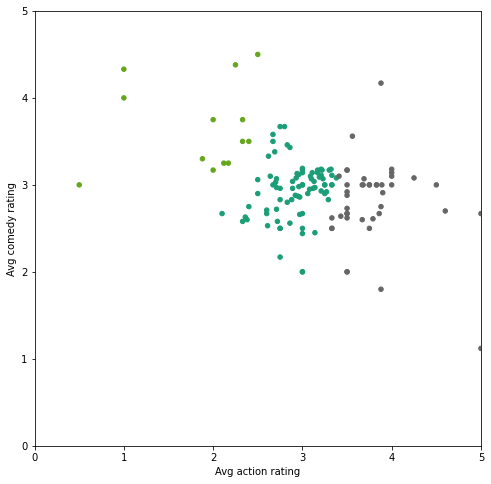

In [63]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)


predictions_2 = kmeans_2.fit_predict(X)

# Plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Avg action rating')
ax.set_ylabel('Avg comedy rating')

clustered = pd.concat([newGenreRatings.reset_index(), pd.DataFrame({'group':predictions_2})], axis=1)
plt.scatter(clustered['avg_action_rating'], clustered['avg_comedy_rating'], c=clustered['group'], s=20, cmap="Dark2")

The three clusters are:

*   Users who like action but not comedy
*   Users who like comedy but not action
*   Users who like both action and comedy

What's the right number of clusters for this dataset?

There are several ways of choosing the number of clusters, k. For this analysis we will use "the elbow method". 

### Elbow Method

The elbow method is one method used to determine k, the number of clusters in the dataset. (Sarkar, 2019)

I will be using a library named Yellowbrick that can plot the elbow curve.  (Yellowbrick, 2019). The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K

In [64]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe32ed58358>,
                 k=None, metric=None, model=None, timings=True)

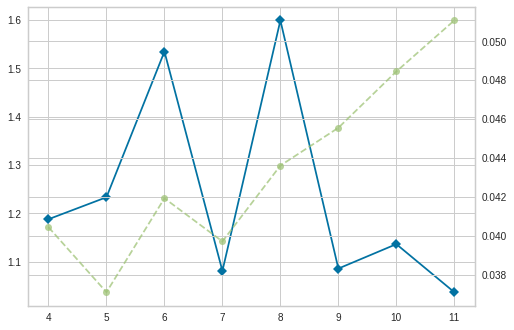

In [65]:
# Instantiate the clustering model and visualizer
model = KMeans()
#k is the number of clusters
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)  

According to this result, 6 would be a good measure for k.

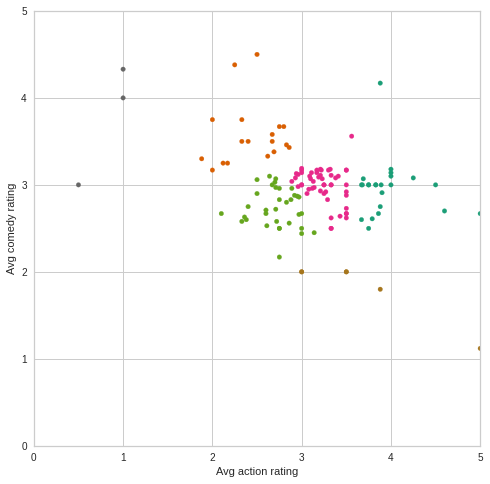

In [66]:
#Create an instance of KMeans to find sixeven clusters
kmeans_4 = KMeans(n_clusters=6)

predictions_4 = kmeans_4.fit_predict(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Avg action rating')
ax.set_ylabel('Avg comedy rating')

clustered = pd.concat([newGenreRatings.reset_index(), pd.DataFrame({'group':predictions_4})], axis=1)
plt.scatter(clustered['avg_action_rating'], clustered['avg_comedy_rating'], c=clustered['group'], s=20,cmap='Dark2')

### Clustering 
 

In [68]:
mostMoviesRatings.head()

title,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Solaris,The 39 Steps,Monsoon Wedding,Once Were Warriors,Three Colors: Red,Men in Black II,The Passion of Joan of Arc,Silent Hill,Sissi,The Hours,License to Wed,48 Hrs.,5 Card Stud,Batman Returns,Sleepless in Seattle,Rain Man,The Conversation,Young and Innocent,Say Anything...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,"Bang, Boom, Bang",Beauty and the Beast,Bridge to Terabithia,All the Way Boys,The Tunnel,Dawn of the Dead,Syriana,Reservoir Dogs,Arlington Road,The Man with the Golden Arm,Grill Point,Back to the Future Part II,The Thomas Crown Affair,Mothra vs. Godzilla,A River Runs Through It,...,Marnie,Curtains,The Omen,S21: The Khmer Rouge Death Machine,Chill Factor,The Domino Principle,Shower,In My Skin,All the President's Men,Bill & Ted's Excellent Adventure,The Dress,A Star Is Born,Rashomon,Kikujiro,Begotten,Spider-Man 2,Training Day,Breakdown,Finding Forrester,The Whole Nine Yards,They Live,The Dark Knight,There's Something About Mary,Keeping the Faith,Trainspotting,Monsieur Batignole,Ed Wood,The Thin Man,"The Good, the Bad and the Ugly",8½,March of the Penguins,Birthday Girl,Brief Encounter,The Revengers' Comedies,The Anniversary,Flash Gordon,Anyone Can Play,Stitches,Forrest Gump,Tron
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,3.0,NaN,4.0,4.0,4.0,NaN,NaN,3.0,3.0,5.0,NaN,5.0,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5,5.0,3.0,NaN,NaN,3.0,4.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,3.5,4.0,3.5,NaN,2.5,2.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,5.0,5.0,3.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,4.0,NaN,4.0,2.5,NaN,NaN,3.5,NaN,NaN,5.0,4.0,4.0,3.5,NaN,NaN,4.0,NaN,NaN,3.5,4.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
cleanedRatings = mostMoviesRatings.fillna(0.0)

In [73]:
#Divide into  clusters as per the elbow recommendation
predictions = KMeans(n_clusters=6, algorithm='full').fit_predict(cleanedRatings)

In [74]:
clustered = pd.concat([mostMoviesRatings.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [75]:
clustered.fillna(' ').head()


,index,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Solaris,The 39 Steps,Monsoon Wedding,Once Were Warriors,Three Colors: Red,Men in Black II,The Passion of Joan of Arc,Silent Hill,Sissi,The Hours,License to Wed,48 Hrs.,5 Card Stud,Batman Returns,Sleepless in Seattle,Rain Man,The Conversation,Young and Innocent,Say Anything...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,"Bang, Boom, Bang",Beauty and the Beast,Bridge to Terabithia,All the Way Boys,The Tunnel,Dawn of the Dead,Syriana,Reservoir Dogs,Arlington Road,The Man with the Golden Arm,Grill Point,Back to the Future Part II,The Thomas Crown Affair,Mothra vs. Godzilla,...,Curtains,The Omen,S21: The Khmer Rouge Death Machine,Chill Factor,The Domino Principle,Shower,In My Skin,All the President's Men,Bill & Ted's Excellent Adventure,The Dress,A Star Is Born,Rashomon,Kikujiro,Begotten,Spider-Man 2,Training Day,Breakdown,Finding Forrester,The Whole Nine Yards,They Live,The Dark Knight,There's Something About Mary,Keeping the Faith,Trainspotting,Monsieur Batignole,Ed Wood,The Thin Man,"The Good, the Bad and the Ugly",8½,March of the Penguins,Birthday Girl,Brief Encounter,The Revengers' Comedies,The Anniversary,Flash Gordon,Anyone Can Play,Stitches,Forrest Gump,Tron,group
0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,4
1,1,4,,3,,4,4,4,,,3,3,5,,5,,3,,,5,,,,,3,,,,,,,,,4,,,,3,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
2,2,4.5,5,3,,,3,4,,,3,,,5,,,,,,3,3.5,4,3.5,,2.5,2,,,,4.5,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,4
3,3,5,,,5,5,,,,,5,,3,,,,5,5,3,,,,5,4,,,,,5,,,,,,5,5,,,5,,...,,,,,,,,,,,,,,,,4,,,,,,,,,,,,,,,,,,,,,,,,3
4,4,,,,,,,,,,3.5,,,,4,,4,2.5,,,3.5,,,5,4,4,3.5,,,4,,,3.5,4.5,,,,,,4,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2


In [76]:
#Pick a cluster ID from 0-6
cluster_number = 1

cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

In [77]:
cluster.fillna(' ').head()

,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Solaris,The 39 Steps,Monsoon Wedding,Once Were Warriors,Three Colors: Red,Men in Black II,The Passion of Joan of Arc,Silent Hill,Sissi,The Hours,License to Wed,48 Hrs.,5 Card Stud,Batman Returns,Sleepless in Seattle,Rain Man,The Conversation,Young and Innocent,Say Anything...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,"Bang, Boom, Bang",Beauty and the Beast,Bridge to Terabithia,All the Way Boys,The Tunnel,Dawn of the Dead,Syriana,Reservoir Dogs,Arlington Road,The Man with the Golden Arm,Grill Point,Back to the Future Part II,The Thomas Crown Affair,Mothra vs. Godzilla,A River Runs Through It,...,Marnie,Curtains,The Omen,S21: The Khmer Rouge Death Machine,Chill Factor,The Domino Principle,Shower,In My Skin,All the President's Men,Bill & Ted's Excellent Adventure,The Dress,A Star Is Born,Rashomon,Kikujiro,Begotten,Spider-Man 2,Training Day,Breakdown,Finding Forrester,The Whole Nine Yards,They Live,The Dark Knight,There's Something About Mary,Keeping the Faith,Trainspotting,Monsieur Batignole,Ed Wood,The Thin Man,"The Good, the Bad and the Ugly",8½,March of the Penguins,Birthday Girl,Brief Encounter,The Revengers' Comedies,The Anniversary,Flash Gordon,Anyone Can Play,Stitches,Forrest Gump,Tron
14,5,2,5,5.0,3,4,3,5,2.5,0.5,5,3,5,3,5,4,5,4,4,1,3,4,2.75,4,,2,4,4,1.5,2.75,5,3.5,3,3,5,3,3,4.5,2,5,...,,1.5,,,,,,2,,,,,,,3,,,,,,,,,,,4,,,1,,,,4,,,,,,,
22,4.5,5,4.5,4.5,3.5,3.5,3.5,4.5,3.5,4,3.5,2.5,3.5,3.5,4,,5,4,3.5,4,4,3.5,2.25,,4.5,2,4.5,4,5,4,4.25,,,,3,3.5,,4.5,5,4,...,,,,,,,,,,,,,,,,,,,,,,,,5,,,,,,,,,,,,,3.5,,,
72,5,5,4.5,4.5,4,5,4,4,3.5,5,4,4.5,5,3.5,5,5,5,3,4,4,4.5,3,3,3,4.5,2,3,4,0.5,4,1.5,3.5,3.5,,4.5,3,3.5,,4.5,5,...,,,,3,,,,,,,,,,,,,,,,,,,,,,,3,,,,,,,,1,,,,,
104,4,3,4,3.0,3,,3.5,4,2.5,,3.5,3,3.5,3,5,3.5,4.5,3.5,4,3.5,3,4,3.25,3,,3,3,4,3,4.5,4,,3,,4,3,3.5,3.5,3.5,4,...,,,,,,,,,,,3,,,,,,,,,,,,,,,,3.5,3,,,,,,,,,,,,
129,,3.5,3,4.5,3,4,3,2,1.5,4,4,4,4,4,5,3.5,4,3.5,3.5,,4,4,3,3,3.5,,2,4.5,3,3.5,,3.5,3.5,,4,2,2,,3,4,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


From this cluster we can see users have rated similar movies. 

In [78]:
#Pick a user ID from the cluster dataset
user_Id = 14

# Get all this user's ratings
user_ratings  = cluster.loc[user_Id, :]

# Get movies they have not rated
unrated_movies =  user_ratings[user_ratings.isnull()]

# Average ratings of these movies
avg_ratings = pd.concat([unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Recommended movies based on userId
avg_ratings.sort_values(ascending=False)[:20]

The Glass House                    5.000000
Irma la Douce                      5.000000
Wilbur Wants to Kill Himself       5.000000
42nd Street                        5.000000
Sunset Boulevard                   5.000000
Amélie                             5.000000
Superman                           5.000000
We're No Angels                    4.750000
Mission: Impossible                4.666667
My Sweet Little Village            4.500000
Caesar Must Die                    4.500000
The Number 23                      4.500000
Batman & Robin                     4.500000
The Host                           4.500000
Lawrence of Arabia                 4.500000
Jönssonligans största kupp         4.500000
eXistenZ                           4.500000
Beavis and Butt-Head Do America    4.500000
Frankenstein's Castle of Freaks    4.333333
The Remains of the Day             4.333333
Name: 0, dtype: float64

## **CONTENT-BASED RECOMMENDER**

In [79]:
tfidf_matrix = tfidf.fit_transform(cb_Moviedata['overview'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [80]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02939938],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02939938, ..., 0.        , 0.        ,
        1.        ]])

In [81]:
titles = pd.Series(cb_Moviedata.index, index=cb_Moviedata['title']).drop_duplicates()

In [82]:
#Method that generates recommendations for a user based on the movie they enter
#https://towardsdatascience.com/how-to-build-a-content-based-movie-recommender-system-92352f5db7c6
def get_recommendations(title):
    index = titles[title]
    similarity = list(enumerate(cosine_sim[index]))
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity = similarity[1:11]
    movie_index = [i[0] for i in similarity]
    return cb_Moviedata['title'].iloc[movie_index]

In [83]:
get_recommendations("Harry Potter and the Philosopher's Stone")

171             Harry Potter and the Goblet of Fire
218       Harry Potter and the Order of the Phoenix
342    Harry Potter and the Deathly Hallows: Part 1
379    Harry Potter and the Deathly Hallows: Part 2
287          Harry Potter and the Half-Blood Prince
512                        The Amazing Spider-Man 2
479                                 Despicable Me 2
437                          The Amazing Spider-Man
102                                     Dirty Harry
673                     Jack Reacher: Never Go Back
Name: title, dtype: object

## 6. Results<a class="anchor" id="Results"></a>

###Collaborative-Filtering Recommender
We have successfully implemented two recommendation systems: a Content-based recommender and a Collaborative-filtering recommender.To answer the research questions as outlined above: Is it possible to generate recommendations without user input, based solely on content for the Movies Dataset? Yes it is.
Are collaborative-filtering recommender systems an effective method of generating recommendations for users? Not really.

For the Collaborative-Filtering recommender, we used a K-means Clustering algorithm to cluster users according to their ratings. We created recommendations based on movies a user had not previously rated and averaged the ratings from the other users in the cluster on those movies to recommend to the user. The following table shows the results of using K-means clustering on user ratings of the MovieLens dataset to show the top 20 recommendations for a user:



In [84]:
#Pick a cluster ID from the clusters above
cluster_number = 0
cluster = clustered[clustered.group == cluster_number].drop(['index','group'], axis=1)

In [85]:
cluster.fillna(' ').head(10)

,Terminator 3: Rise of the Machines,The Million Dollar Hotel,Solaris,The 39 Steps,Monsoon Wedding,Once Were Warriors,Three Colors: Red,Men in Black II,The Passion of Joan of Arc,Silent Hill,Sissi,The Hours,License to Wed,48 Hrs.,5 Card Stud,Batman Returns,Sleepless in Seattle,Rain Man,The Conversation,Young and Innocent,Say Anything...,Rope,Titanic,A Nightmare on Elm Street,To Kill a Mockingbird,"Bang, Boom, Bang",Beauty and the Beast,Bridge to Terabithia,All the Way Boys,The Tunnel,Dawn of the Dead,Syriana,Reservoir Dogs,Arlington Road,The Man with the Golden Arm,Grill Point,Back to the Future Part II,The Thomas Crown Affair,Mothra vs. Godzilla,A River Runs Through It,...,Marnie,Curtains,The Omen,S21: The Khmer Rouge Death Machine,Chill Factor,The Domino Principle,Shower,In My Skin,All the President's Men,Bill & Ted's Excellent Adventure,The Dress,A Star Is Born,Rashomon,Kikujiro,Begotten,Spider-Man 2,Training Day,Breakdown,Finding Forrester,The Whole Nine Yards,They Live,The Dark Knight,There's Something About Mary,Keeping the Faith,Trainspotting,Monsieur Batignole,Ed Wood,The Thin Man,"The Good, the Bad and the Ugly",8½,March of the Penguins,Birthday Girl,Brief Encounter,The Revengers' Comedies,The Anniversary,Flash Gordon,Anyone Can Play,Stitches,Forrest Gump,Tron
1,4,,3,,4,4,4,,,3,3,5,,5,,3,,,5,,,,,3,,,,,,,,,4,,,,3,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31,2,,,,5,,5,,,3,5,5,,5,,3,,3,4,,,,,4,2,4,,,,,,5,,,,3,4,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35,4,4,4,5,3,5,,,,3,3,3,,,,,,,3,,,,3,,,,,,,,,,,,,,3,,,5,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38,5,,3,,,,5,,,3,4,3,,4,,,,5,3,,,,,,3,4,4,,,,,4,,,,4,5,,,4,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46,4,,5,,,,5,,,4,5,,,4,,,,4,3,,,,,,3,3,,,,,,3,,,,5,4,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49,4,,,,4,4,4,,4,,3,3,,3,,,,3,,,,,3,3,,2,,,,,,1,,,,3,4,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63,5,5,5,,,,4,,,,4,5,,3,,,,4,4,,,,,,3,2,,,,,,3,,,,,3,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,5,5,5,4,5,,5,,4,,4,5,,,,5,,,3,,,,5,,4,,3,,,,,,,4,4,3,,,,4,...,,,,,,,,,,,,,,,,,,,3,,,,,,,,,,,,,,,,,,,,,
81,5,5,4,,,,5,,,4,3,4,,4,,4,,3,3,,,,,,5,3,,,,,,4,,,,2,3,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
84,5,5,4,,5,2,5,,,3,5,3,,,,3,,5,4,,,,4,5,3,4,5,,,,,4,4,,,5,4,,,5,...,,,,,,,,,,,,,4,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [86]:
#Pick a user ID from the cluster dataset
user_Id = 1

# Get all this user's ratings
user_ratings  = cluster.loc[user_Id, :]

# Get movies they have not rated
unrated_movies =  user_ratings[user_ratings.isnull()]

# Average ratings of these movies
avg_ratings = pd.concat([unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Recommended movies based on userId
avg_ratings.sort_values(ascending=False)[:20]

Nostalgia                          5.0
One Night at McCool's              5.0
The Dreamers                       5.0
Will Penny                         5.0
Cop Land                           5.0
The Sixth Sense                    5.0
Rush Hour                          5.0
Captain Corelli's Mandolin         5.0
Don Juan DeMarco                   5.0
Monty Python and the Holy Grail    5.0
The Good Shepherd                  5.0
The Bridge                         5.0
Jack & Sarah                       5.0
Memoirs of an Invisible Man        5.0
The Next Best Thing                5.0
The Perfect Storm                  5.0
Saw                                5.0
Barton Fink                        5.0
The Motorcycle Diaries             5.0
Rocky                              5.0
Name: 0, dtype: float64

The recommender did a decent job at recommending movies that the user has not seen however the results are not great. To strengthen the results we would need to revise the algorithm for generating the recommendations and perhaps provide different weightings for movies that have been rated.

###Content-Based Recommender

The system has done a decent job of recommending movies that a user has not rated and the quality of recommendations is great. "The Dark Knight Rises" returns all Batman movies. The present system could be strengthed if it were to take the director or actors into account e.g. recommend Christopher Nolan movies if someone entered the Dark Knight.



For the Content-based recommender, we used a text similarity algorithm using TF-IDF and Cosine Similarity. We created recommendations based on the overviews of movies and generated recommendations based on the input of a film. The following table shows the results of using TF-IDF and Cosine Similarity on movie overviews in the MovieLens dataset to show the top 20 recommendations to the user:

In [87]:
get_recommendations("The Dark Knight")

406                                The Dark Knight Rises
163                                        Batman Begins
477       Lego Batman: The Movie - DC Super Heroes Unite
680                                The Lego Batman Movie
434                      Superman/Batman: Public Enemies
605                   Batman v Superman: Dawn of Justice
479                                      Despicable Me 2
408                   Sherlock Holmes: A Game of Shadows
41                                   Tomorrow Never Dies
595    Ghost in the Shell: Stand Alone Complex - The ...
Name: title, dtype: object

# 7. Conclusion <a class="anchor" id="Conclusion"></a>

To conclude, we mentioned in the introduction of this analysis, that recommender systems are essential to industries today and perhaps the reason for the success of many of the worlds biggest companies. In this analysis, we explored the basic ideas of how these recommendation systems work.
We demonstrated an example of a collaborative filtering recommender system that recommends movies to users based on their previous ratings of movies. While using the MovieLens dataset, we were able to gather user ratings and create an algorithm using K-Means clustering to partition users into groups of similar users. By isolating each group, we generated recommendations based on users in each separate group. From this, we were able to produce a list of movie recommendations that the user had not previously rated. K-means clustering is a popular clustering algorithm whose goal is to group data points into distinct non-overlapping subgroups. It works efficiently when the clusters have an evident circular shape. However, its effectiveness deteriorates if they do not, which may be why the recommender wasn't as effective.

We also demonstrated an example of a content-based filtering recommender system that recommends movies to users based on their overviews. Using TF-IDF and Cosine Similarity, we calculated the similarity between two overviews. We generated recommendations based on a singular movie from the dataset. From this, we were able to produce a list of movie recommendations that had a similar overview according to the algorithm. The idea was to transform each overview to vectors and compare the overviews by measuring the distance between these vectors.

There are clear limitations to both the algorithms that we explored. Fundamentally, for future improvements, a hybrid recommender system can be adopted. We can take the advantages from both Content-based filtering and Collaborative filtering and create a hybrid system that could give more accurate recommendations. Combining collaborative filtering and content-based approaches achieve more accurate results. These are used by many large companies today. 

# 8. Reference List/Bibliography <a class="anchor" id="Reference"></a>


1. Rocca, B., 2019. Introduction to recommender systems. [Online] 
Available at: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
[Accessed 05 12 2020].


2. Sarkar, T., 2019. Clustering metrics better than the elbow-method. [Online] 
Available at: https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6
[Accessed 05 12 2020].


3. Yellowbrick, 2019. Elbow Method. [Online] 
Available at: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
[Accessed 05 12 2020].


4. Striphas, T. & Hallinan, B., 2014. Recommended for you: The Netflix Prize and the production of algorithmic culture. [Online] 
Available at: https://journals.sagepub.com/doi/full/10.1177/1461444814538646#:~:text=On%206%20October%202006%2C%20Netflix,Cinematch%2C%20the%20company's%20existing%20system.
[Accessed 05 12 2020].


5. Linden, G. D., Jacobi, J. A. & Benson, E. A., 1998. Collaborative recommendations using item-to-item similarity mappings. United States of America, Patent No. US6266649B1.


6. Smith, B. & Linden, G., 2017. Two Decades of Recommender. [Online] 
Available at: https://assets.amazon.science/76/9e/7eac89c14a838746e91dde0a5e9f/two-decades-of-recommender-systems-at-amazon.pdf
[Accessed 05 12 2020].


7. Sieg, A., 2018. Text Similarities : Estimate the degree of similarity between two texts. [Online] 
Available at: https://medium.com/@adriensieg/text-similarities-da019229c894
[Accessed 05 12 2020].


8. Jayaswal, V., 2020. Text Vectorization: Term Frequency — Inverse Document Frequency (TFIDF). [Online] 
Available at: https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d
[Accessed 05 12 2020].


9. Stecanella, B., 2019. What is TF-IDF?. [Online] 
Available at: https://monkeylearn.com/blog/what-is-tf-idf/#:~:text=TF%2DIDF%20is%20a%20statistical,across%20a%20set%20of%20documents.
[Accessed 05 12 2020].


10. Garbade, D. M. J., 2018. Understanding K-means Clustering in Machine Learning. [Online] 
Available at: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1#:~:text=in%20a%20dataset.%E2%80%9D-,A%20cluster%20refers%20to%20a%20collection%20of%20data,together%20because%20of%20certain%20similarities.&text=In%20other%2
[Accessed 05 12 2020].


11. Dabbura, I., 2018. K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks. [Online] 
Available at: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
[Accessed 05 12 2020].





